# ENSF 544: Success of Placement for US Graduate Programs
### Due: April 11 at 11:59pm

### Name: Shamis Ali

#### Importing necessary libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Logistic Regression

Importing the dataset for this project in a pandas dataframe.  
The link to the dataset is: https://www.kaggle.com/datasets/mahad049/job-placement-dataset

In [59]:
job_data = pd.read_csv('job_placement.csv')

# Printing the data
print(job_data)

      id             name  gender  age      degree  \
0      1         John Doe    Male   25  Bachelor's   
1      2       Jane Smith  Female   24  Bachelor's   
2      3  Michael Johnson    Male   26  Bachelor's   
3      4      Emily Davis  Female   23  Bachelor's   
4      5      David Brown    Male   24  Bachelor's   
..   ...              ...     ...  ...         ...   
695  696     Lucas Taylor    Male   23  Bachelor's   
696  697    Emma Martinez  Female   26  Bachelor's   
697  698      Aiden Davis    Male   24  Bachelor's   
698  699       Mia Wilson  Female   23  Bachelor's   
699  700      Jack Garcia    Male   26  Bachelor's   

                            stream                               college_name  \
0                 Computer Science                         Harvard University   
1           Electrical Engineering      Massachusetts Institute of Technology   
2           Mechanical Engineering                        Stanford University   
3           Information Tec

In [60]:
# Printing the data type for each feature
print(job_data.dtypes)

id                       int64
name                    object
gender                  object
age                      int64
degree                  object
stream                  object
college_name            object
placement_status        object
salary                   int64
gpa                    float64
years_of_experience    float64
dtype: object


As we can see above, their are many feartures which have non-numerical data. Since ML models do not work with non-numerical data, we are using OneHotEncoder to encode them into numerical values so we can train our model

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Choosing OneHotEncoder since we have a fixed number of entries/data in each of the categories

ct = ColumnTransformer(
    [("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), ['gender', 'degree', 'stream', 'college_name'])])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Using Pipeline to ensure correct sequence is followed (first preprocessing the data, and then training the model on the
# preprocessed data)

pipe = Pipeline(steps=[('preprocessor', ct), ('model', LogisticRegression())])

In [63]:
from sklearn.preprocessing import LabelEncoder

# Dropping the features which are not relevant OR are supposed to be predicted
X = job_data.drop(['id', 'placement_status', 'name'], axis=1)
# Using LabelEncoder since OneHotEncoder is for our feature matrix, and LabelEncoder is for our target vector
le = LabelEncoder()
y = le.fit_transform(job_data['placement_status'])

In [64]:
# Splitting the dataset into training and testing sets, 90% and 10% respectively
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [65]:
# Defining a set of possible values for our hyperparameters. These will be used to train the classifier and find
# the best possible model with the given values
param_grid = [{'model': [LogisticRegression(max_iter=1000)],
              'model__C': [0.01, 0.1, 1.0, 10.0, 100],
              'model__max_iter': [100, 500, 1000, 2000],
              'model__fit_intercept': [True, False]}]

In [66]:
# Using GridSearchCV to try out all the possible hyperparameters defined in the param_grid
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'model': LogisticRegression(max_iter=1000), 'model__C': 100, 'model__fit_intercept': True, 'model__max_iter': 100}

Best cross-validation train score: 0.99
Best cross-validation score: 0.98
Test-set score: 0.96


In [67]:
# Picking the best model and finding the y_pred value from the testing data using the said best model
model_ideal = grid.best_estimator_
y_pred = model_ideal.predict(X_test)

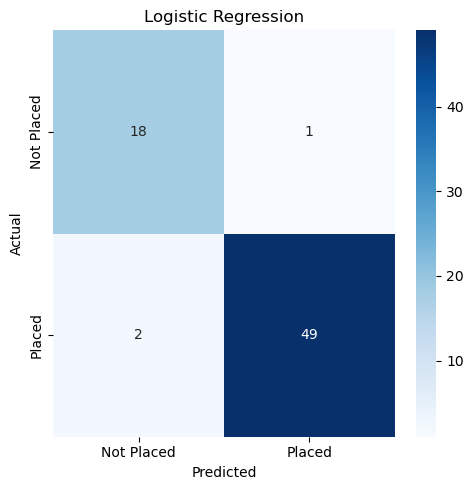

In [68]:
# Generating/Creating a confusion matrix to find out false positives and negatives
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(figsize=(5, 5))

sns.heatmap(cm_lr, xticklabels=['Not Placed', 'Placed'],  yticklabels=['Not Placed', 'Placed'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('Logistic Regression')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Conclusion
The model performed exceptionally well on both training and testing dataset, indicating that there was no overfitting. The following are the scores:    
Best cross-validation train score: 0.99   
Best cross-validation score: 0.98   
Test-set score: 0.96  
Furthermore, looking at the confusion matrix, we can clearly see that the number of false positive and negatives is very low, further reinforcing our point that the model performs well.

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Choosing RandomForestClassifier as the problem is that of classification
rf = RandomForestClassifier(random_state=0)

# Using Pipeline to ensure correct sequence is followed (first preprocessing the data, and then training the model on the
# preprocessed data)
pipe_forest = Pipeline(steps=[('preprocessor', ct), ('pca', PCA(n_components=0.95, whiten=True) ), ('model', RandomForestClassifier(random_state=0))])

In [ ]:
# Defining a set of possible values for our hyperparameters. These will be used to train the classifier and find
# the best possible model with the given values
param_grid_forest = {
    'model__n_estimators': [100, 500, 1000],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [1, 5, 10],
    'model__min_samples_leaf': [1, 5, 10]
}

In [ ]:
# Defining the GridSearchCV to use the hyperparameters defined above
grid_forest = GridSearchCV(pipe_forest, param_grid=param_grid_forest, cv=5, n_jobs=-1, return_train_score=True)

In [ ]:
grid_forest.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid_forest.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_forest.cv_results_['mean_train_score'][grid_forest.best_index_]))
print("Best cross-validation score: {:.2f}".format(grid_forest.best_score_))
print("Test-set score: {:.2f}".format(grid_forest.score(X_test, y_test)))

Best params:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}

Best cross-validation train score: 0.99
Best cross-validation score: 0.98
Test-set score: 0.97


In [ ]:
# Picking the best model and finding the y_pred value from the testing data using the said best model
model_forest = grid_forest.best_estimator_
y_predf = model_forest.predict(X_test)

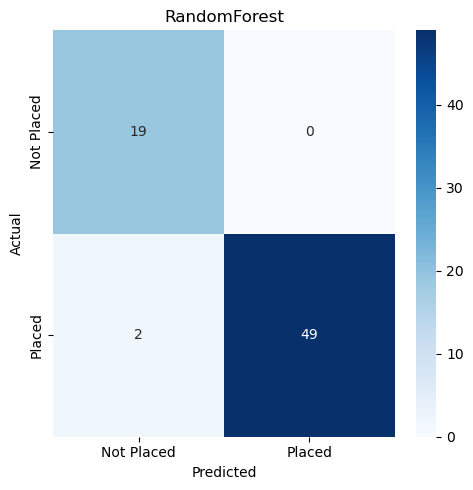

In [ ]:
# Generating/Creating a confusion matrix to find out false positives and negatives
from sklearn.metrics import confusion_matrix
cm_lrf = confusion_matrix(y_test, y_predf)
fig, axes = plt.subplots(figsize=(5, 5))

sns.heatmap(cm_lrf, xticklabels=['Not Placed', 'Placed'],  yticklabels=['Not Placed', 'Placed'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('RandomForest')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

plt.tight_layout()
plt.show()

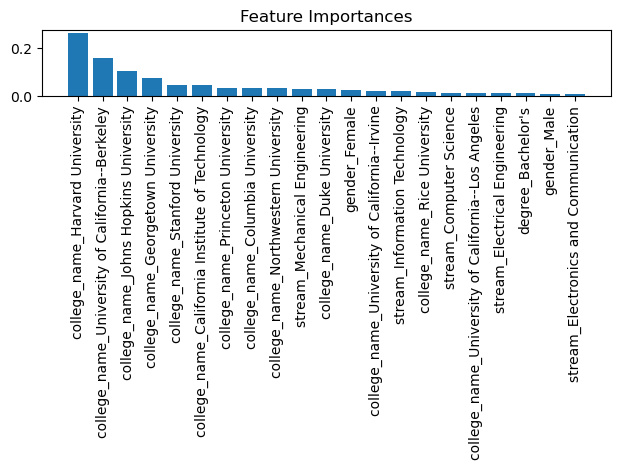

In [ ]:
# Plotting a Feature Importance plot to check which features get relied on the most
# to have an affect on the result

best_rfm = grid_forest.best_estimator_.named_steps['model']
importances = best_rfm.feature_importances_

fitted_ct = grid_forest.best_estimator_.named_steps['preprocessor']
onehot = fitted_ct.named_transformers_["onehot"]
onehot_feature_names = onehot.get_feature_names_out(['gender', 'degree', 'stream', 'college_name'])
feature_names = list(onehot_feature_names)

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC
# Using Pipeline to ensure correct sequence is followed (first preprocessing the data, and then training the model on the
# preprocessed data)
pipe_svc = Pipeline(steps=[('preprocessor', ct), ('pca', PCA(n_components=0.95, whiten=True) ), ('model', SVC(random_state=0))])

In [ ]:
# Defining a set of possible values for our hyperparameters. These will be used to train the classifier and find
# the best possible model with the given values
param_grid_svc = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

In [ ]:
# Defining the GridSearchCV to use the hyperparameters defined above
grid_svc = GridSearchCV(pipe_svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, return_train_score=True)

In [ ]:
grid_svc.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid_svc.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_svc.cv_results_['mean_train_score'][grid_svc.best_index_]))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Test-set score: {:.2f}".format(grid_svc.score(X_test, y_test)))

Best params:
{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}

Best cross-validation train score: 0.98
Best cross-validation score: 0.98
Test-set score: 0.96


In [ ]:
# Picking the best model and finding the y_pred value from the testing data using the said best model
model_svc = grid_svc.best_estimator_
y_predsvc = model_svc.predict(X_test)

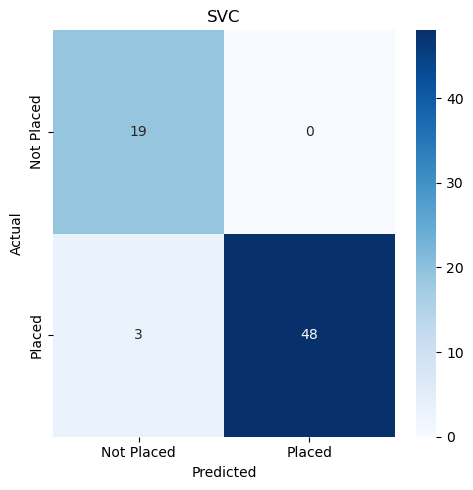

In [ ]:
# Generating/Creating a confusion matrix to find out false positives and negatives
from sklearn.metrics import confusion_matrix
cm_lrsvc = confusion_matrix(y_test, y_predsvc)
fig, axes = plt.subplots(figsize=(5, 5))

sns.heatmap(cm_lrsvc, xticklabels=['Not Placed', 'Placed'],  yticklabels=['Not Placed', 'Placed'],  annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title('SVC')
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

plt.tight_layout()
plt.show()

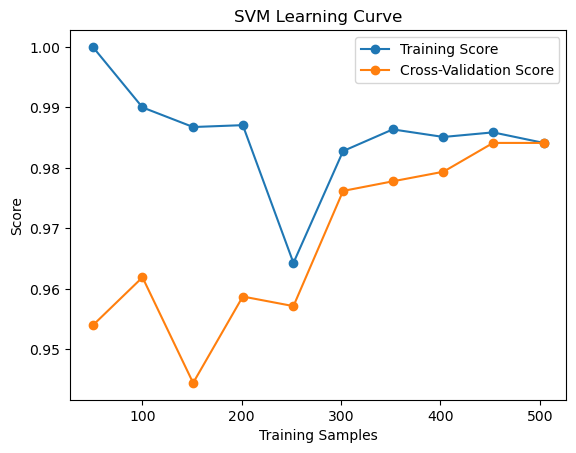

In [ ]:
# Generating/Creating a Learning Curve for the model to see whether the model is underfitting or overfitting the data
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    grid_svc.best_estimator_, X_train, y_train,
    cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
plt.plot(train_sizes, valid_scores_mean, 'o-', label="Cross-Validation Score")
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("SVM Learning Curve")
plt.legend(loc="best")
plt.show()

Explanationg for Learning Curve:   
Initially for the first few hundred samples, the model was highly overfitting as can be seen from the high training score but when exposed to testing data, generated a low validation score since it did not generalize the patterns.   
Around 270 samples, we can see good fitting but accuracy was low due to both the scores being similar to each other, but overall being low.   
Lastly, we can see nearing 500 samples, the scores are starting to converge on a good score, indicating that we were able to find a good fit as well as the model was able to generalize well on unseen data, showing good accuracy

## Conclusion for the Project
All three models performed exceptionally well when trained, mainly because we used GridSearchCV to find the best possible list of hyper-parameters. Overall the scores were really similar as summarized below:

# Model Performance Summary

| Model               | Best Parameters                                               | CV Train Score | CV Validation Score | Test-set Score |
|---------------------|---------------------------------------------------------------|----------------|---------------------|----------------|
| Logistic Regression | `{'C': 100, 'fit_intercept': True, 'max_iter': 100}`          | 0.99           | 0.98                | 0.96           |
| Random Forest       | `{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}` | 0.99    | 0.98         | 0.97    |
| SVM                 | `{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}` | 0.98    | 0.98         | 0.96    |

As you can see above, the RandomForest was the best model on account of high training, testing and validation scores. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I sourced my code pretty much entirely from my old assignments and the lab + examples on D2L
2. I did use generative AI. The following is where I used it:
   - I used ChatGPT for help with the learning curve graph and feature importance graph
   - I was struggling with data processing so used GPT to understand encoding and found LabelEncoder that pretty much helped me a lot
3. I had challenges which I described above